/var/folders/v7/zh6wqb114hx75yxkxln1jgfc0000gp/T/ipykernel_16803/4132327388.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start="2024-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  11 of 11 completed


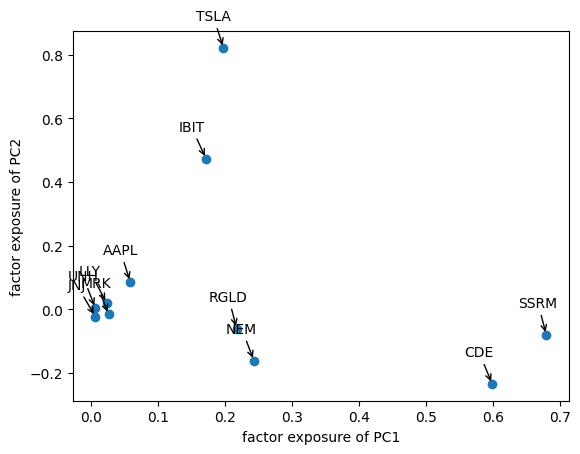

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

symbols = ["NEM","RGLD","SSRM","CDE","LLY","UNH","JNJ","MRK","TSLA","AAPL","IBIT"]
data = yf.download(symbols, start="2024-01-01", end="2025-01-01")['Close']
returns = data.pct_change().dropna()
pca = PCA(n_components=3)
pca.fit(returns)

factor_exposures = pd.DataFrame(
    pca.components_, # 3 components * 12 stocks dimension
    index=["PC1","PC2","PC3"],
    columns=returns.columns
)
labels = factor_exposures.columns
data = factor_exposures.values
plt.scatter(data[0, :], data[1, :])
plt.xlabel("factor exposure of PC1")
plt.ylabel("factor exposure of PC2")
for label,x,y in zip(labels, data[0, :], data[1, :]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20,20),
        textcoords="offset points",
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=0"
        )
    )
### factor_returns = X.dot(pca.components_.T)
# factor_returns = pd.DataFrame(
#     columns=["PC1","PC2","PC3"],
#     index=returns.index,
#     data=factor_returns
# )
# factor_returns